<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%92%D0%BB%D0%B8%D1%8F%D0%BD%D0%B8%D0%B5%20%D1%81%D1%82%D0%B0%D1%82%D1%83%D1%81%D0%B0%20IPO%20%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8%20%D0%BD%D0%B0%20%D1%81%D0%B5%D1%80%D1%8C%D0%B5%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D1%83%D0%B2%D0%BE%D0%BB%D1%8C%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils  
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt 
import re 
%config InlineBackend.figure_format = 'svg' 

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Резюме HeadHunter**

In [ ]:
!unzip '/content/drive/MyDrive/Numpy/Увольнения в технологической компании (2022–2023 гг.).zip'

Archive:  /content/drive/MyDrive/Numpy/Увольнения в технологической компании (2022–2023 гг.).zip
  inflating: tech_layoffs.csv        


In [ ]:
hh_df = pd.read_csv('/content/tech_layoffs.csv')

In [ ]:
hh_df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


In [ ]:
del hh_df['additional_notes'] 
del hh_df['reported_date'] 
hh_df

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status
0,C2FO,20,2,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,Health Care,New York,Axios,Private
...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,"enterprise tech, analytics",San Francisco,New York Times,Public
485,Oracle,Unclear,Unclear,"SaaS, enterprise software",Austin,The Information,Public
486,LivePerson,Unclear,Unclear,Customer service,New York,LinkedIn,Public
487,Skillz,Unclear,Unclear,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public


In [ ]:
hh_df['total_layoffs'] = pd.to_numeric(hh_df['total_layoffs'], errors='coerce').fillna(0).astype(int)
hh_df

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status
0,C2FO,20,2,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,0,2,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,Health Care,New York,Axios,Private
...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,"enterprise tech, analytics",San Francisco,New York Times,Public
485,Oracle,0,Unclear,"SaaS, enterprise software",Austin,The Information,Public
486,LivePerson,0,Unclear,Customer service,New York,LinkedIn,Public
487,Skillz,0,Unclear,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public


In [ ]:
hh_df['impacted_workforce_percentage'] = pd.to_numeric(hh_df['impacted_workforce_percentage'], errors='coerce').fillna(0).astype(int)
hh_df

,company,total_layoffs,impacted_workforce_percentage,industry,headquarter_location,sources,status
0,C2FO,20,2,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,0,2,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,Health Care,New York,Axios,Private
...,...,...,...,...,...,...,...
484,Salesforce,9090,0,"enterprise tech, analytics",San Francisco,New York Times,Public
485,Oracle,0,0,"SaaS, enterprise software",Austin,The Information,Public
486,LivePerson,0,0,Customer service,New York,LinkedIn,Public
487,Skillz,0,0,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public


In [ ]:
hh_df.groupby('total_layoffs')['total_layoffs'].count() 

total_layoffs
0        182
5          1
7          1
10         1
11         1
        ... 
9090       1
10000      1
11000      1
12000      1
18000      1
Name: total_layoffs, Length: 150, dtype: int64

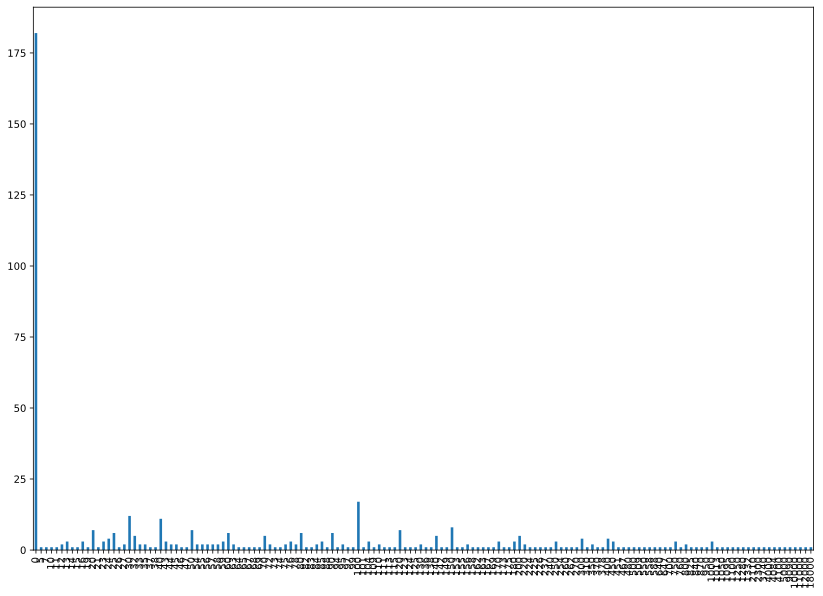

In [ ]:
hh_df[hh_df.groupby('total_layoffs')['total_layoffs'].transform('count') < 20000]['total_layoffs'].astype('int').value_counts().sort_index().plot(kind='bar')

In [ ]:
def сity_categories(arg):
  millionCities = "Puplic Private"
  item= arg.strip() # Удаляем пробелы
  if item == "Public": return "Public"
  if item == "Private": return "Private"
  else: return "Государственная"

In [ ]:
hh_df['status'] = [сity_categories(cell) for cell in hh_df['status']]

In [ ]:
hh_df.groupby('status')['total_layoffs'].describe().sort_values(by='count', 
                                    ascending=False).astype('int')

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Private,370,90,317,0,0,25,89,5000
Public,119,878,2546,0,0,110,490,18000


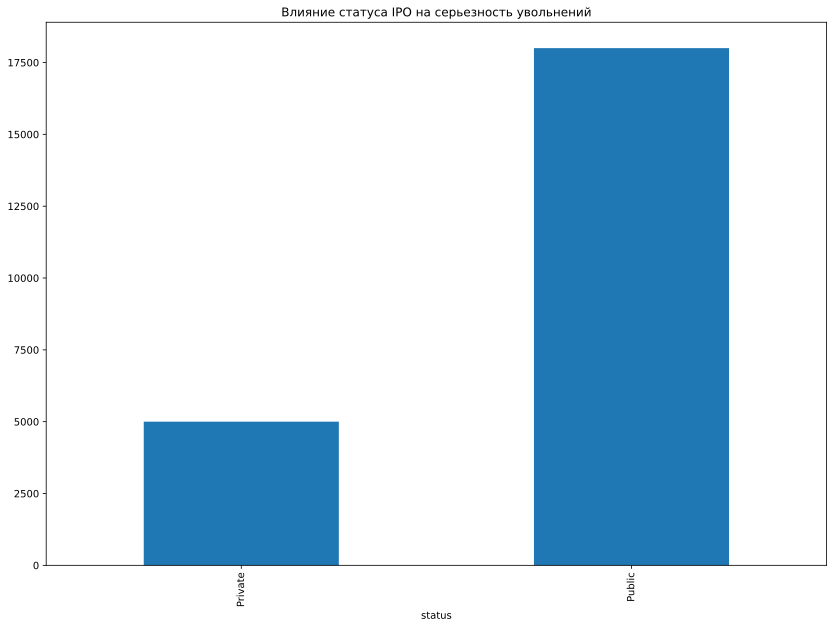

In [ ]:
city = hh_df.groupby('status')['total_layoffs'].describe()['max'].plot(kind = 'bar')
plt.title('Влияние статуса IPO на серьезность увольнений')
plt.show()